<a href="https://colab.research.google.com/github/LeMagnifiq/Suleyman-Portfolio/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing the Kaggle dataset API** 

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lemagnifiq","key":"8d03255afa4acff15e58b719f0ee8da4"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d robinreni/titanic-dataset

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 58.5MB/s]


In [7]:
!unzip titanic-dataset.zip

Archive:  titanic-dataset.zip
  inflating: gender submission.csv   
  inflating: test.csv                
  inflating: train.csv               


**Import Libraries**

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

**Load the dataset**

In [9]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

**Data Exploration**

In [10]:
# Data Exploration
## View the first five rows of the dataset
print(train_data.head(5))
train_data.info()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

**Data Preprocessing**

In [11]:
# Data Preprocessing
## Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [12]:
## Convert categorical data
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [13]:
## Drop irrelevant features
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
## Scale the features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

**Data Visualisation**

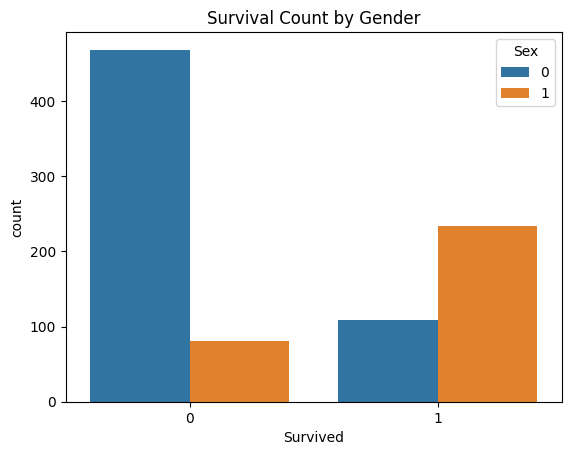

In [16]:
## Bar chart
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Count by Gender')
plt.show()

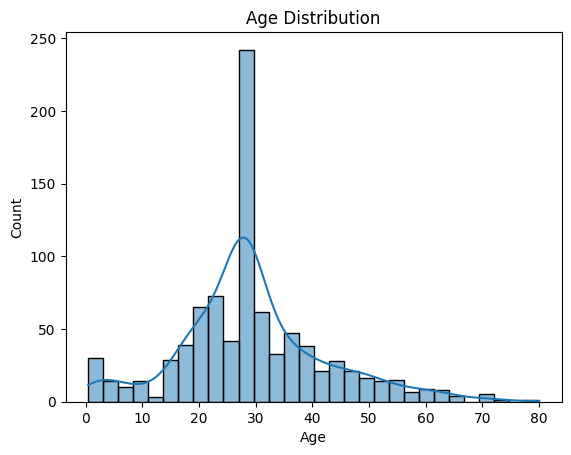

In [17]:
## Histogram
sns.histplot(train_data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

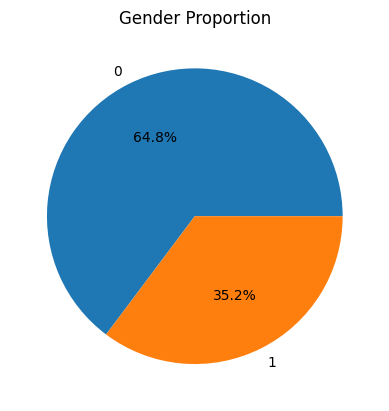

In [18]:
## Pie chart
gender_counts = train_data['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Proportion')
plt.show()

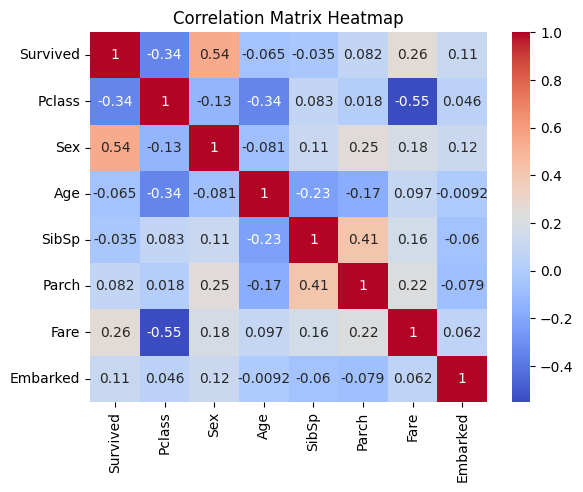

In [19]:
## Heatmap
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

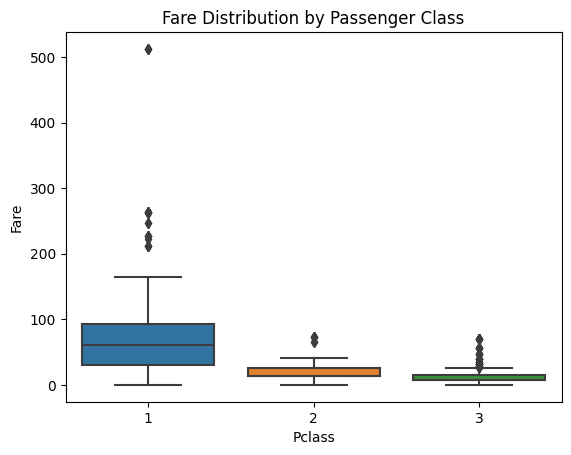

In [20]:
## Box plot
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

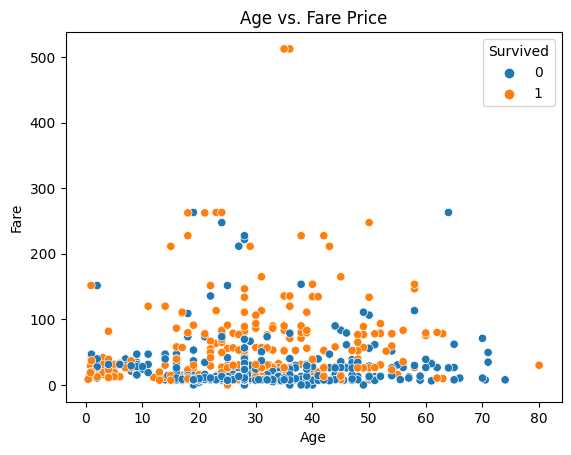

In [21]:
## Scatter plot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Age vs. Fare Price')
plt.show()

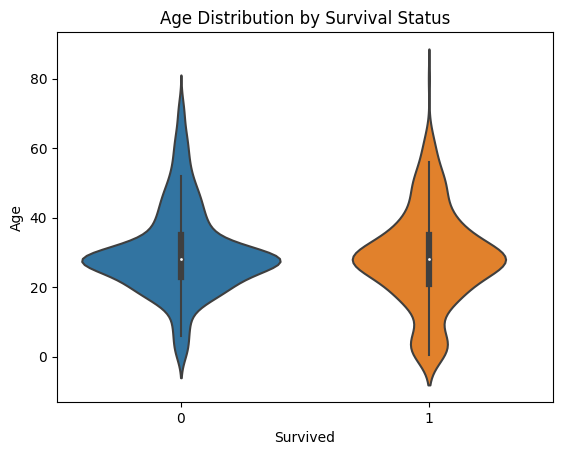

In [22]:
## Violin plot
sns.violinplot(x='Survived', y='Age', data=train_data)
plt.title('Age Distribution by Survival Status')
plt.show()

**Data Splitting**

In [23]:
# Splitting the dataset into training and testing sets
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Modelling**

In [24]:
# Training the Random Forests Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Evaluation of model's performance**

In [33]:
## Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

## Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

## Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

## F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

## ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.8156424581005587
Precision: 0.7887323943661971
Recall: 0.7567567567567568
F1-score: 0.7724137931034482
ROC-AUC score: 0.806949806949807


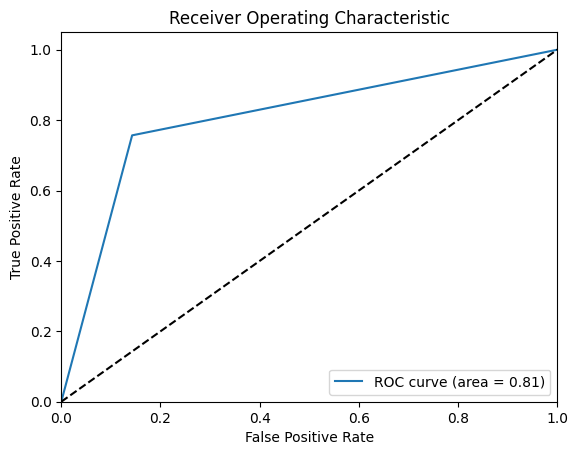

In [34]:
## Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Experimenting with other algorithms**

In [35]:
# Experimenting with other algorithms
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machines': SVC(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Trees': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for model_name, model in models.items():
    # Predictions
    y_pred = model.fit(X_train, y_train).predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy}")

    class_report = classification_report(y_test, y_pred)
    print(f"{model_name} - Classification Report:\n{class_report}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{model_name} - Confusion Matrix:\n{conf_matrix}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.7988826815642458
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Logistic Regression - Confusion Matrix:
[[89 16]
 [20 54]]

Support Vector Machines - Accuracy: 0.6536312849162011
Support Vector Machines - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179

Support Vector Machines - Confusion Matrix:
[[99  6]
 [56 18]]

k-Nearest Neighbors - 